# Clustering Practice Test
## Febi Andika Dani Fajar Suryawan

In [57]:
# Memanggil library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN

In [3]:
# Memanggil dataset
spec=pd.read_csv('automobile-spec.csv',delimiter=",")
risk=pd.read_csv('automobile-risk.csv',delimiter=",")
losses=pd.read_csv('automobile-losses.csv',delimiter=",")

In [4]:
# Menggabungkan beberapa dataset menjadi satu
join1=pd.merge(spec,risk,how='left',on='ID')
join2=pd.merge(join1,losses,how='left',on='ID')
join2.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling,normalized-losses
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3,NaN
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3,NaN
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1,NaN
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2,164.0
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2,164.0


In [6]:
# Mengecek apakah ada missing values dari data
join2.isnull().sum()

ID                    0
make                  0
fuel-type             0
aspiration            0
num-of-doors          1
body-style            0
drive-wheel           0
engine-loc            0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
cylinder              0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
symboling             0
normalized-losses    41
dtype: int64

In [7]:
# Menghilangkan kolom normalized-losses
data=join2.drop(columns=['normalized-losses'])
data.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2


In [8]:
# Mengganti missing values
for column in data[['bore', 'stroke', 'horsepower', 'peak-rpm','price']]:
    median = data[column].median()
    data[column] = data[column].fillna(median)
data['num-of-doors']=data['num-of-doors'].fillna('four')
data.isnull().sum()

ID                   0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheel          0
engine-loc           0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
cylinder             0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
symboling            0
dtype: int64

In [121]:
# Transformasi data menjadi bentuk standar
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
test1=data[['horsepower','price']]
uji1=scaler.fit(test1)
X=uji1.transform(test1)

### Model K-Means

Text(0.5,1,'Grafik Harga')

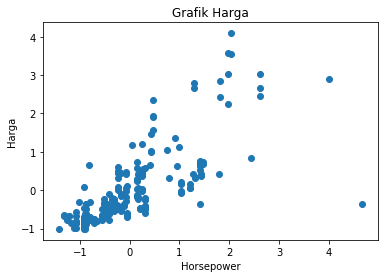

In [122]:
## Step 1. Menampilkan data ke dalam grafik scatterplot 
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel("Horsepower")
plt.ylabel("Harga")
plt.title("Grafik Harga")

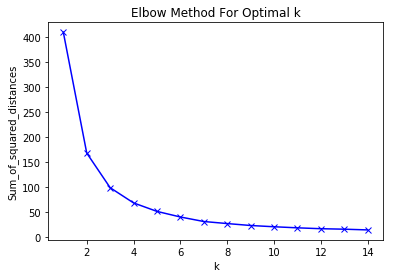

In [123]:
# Step 2. Menentukan nilai K dengan scree plot
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [124]:
# Step 3. Melakukan aktivasi algoritma K-Means 
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [125]:
# Step 4. Menampilkan nilai centroid yang dibangkitkan oleh algoritma kmeans 
print(kmeans.cluster_centers_)

[[ 1.18014382  0.61659568]
 [-0.02471717 -0.04520892]
 [-0.81953824 -0.70210463]
 [ 2.03540963  2.90294035]]


In [126]:
print(kmeans.labels_)

[1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 3 3 3 2 2 2 2 2 1 2 2 2 1 2 0 2 2 2 2 2 2 2
 2 2 2 2 1 1 2 2 2 1 3 3 3 2 2 2 2 2 1 1 1 0 2 2 2 2 2 1 0 1 0 0 0 3 3 3 3
 3 0 2 2 2 1 1 2 0 0 0 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 1 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 0 2 1 2 2 2 2 0 0 3 3 3 0 1 1 1 1 1 1 0 0 2 2 2 2 2 1 2 1 2 1
 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 2 2 1 1 1 0 0 0 0 2 2 2
 2 2 2 1 1 1 1 2 1 1 1 1 1 0 0 1 0 0 1 0]


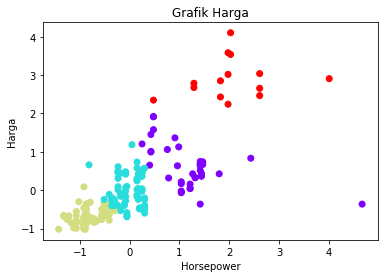

In [127]:
# Step 5. Visualisasi Hasil 
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel("Horsepower")
plt.ylabel("Harga")
plt.title("Grafik Harga")
plt.show()

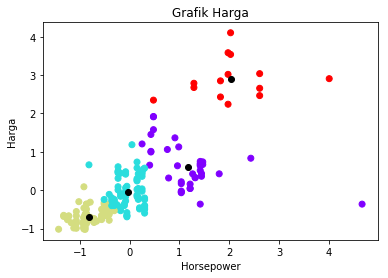

In [128]:
# Step 6. Menampilkan hasil centroid 
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.xlabel("Horsepower")
plt.ylabel("Harga")
plt.title("Grafik Harga")
plt.show()

In [193]:
# Step 7. Memasukkan label hasil clustering kedalam data 
km=data
km['Cluster']=pd.DataFrame(kmeans.labels_+1)
Hasil=km[['make','horsepower','price','Cluster']].sort_values(by=['Cluster','price'])
Hasil.head()

,make,horsepower,price,Cluster
9,audi,160.0,10295.0,1
129,porsche,288.0,10295.0,1
82,mitsubishi,145.0,12629.0,1
124,plymouth,145.0,12764.0,1
29,dodge,145.0,12964.0,1


Text(0.5,1,'Cluster 3')

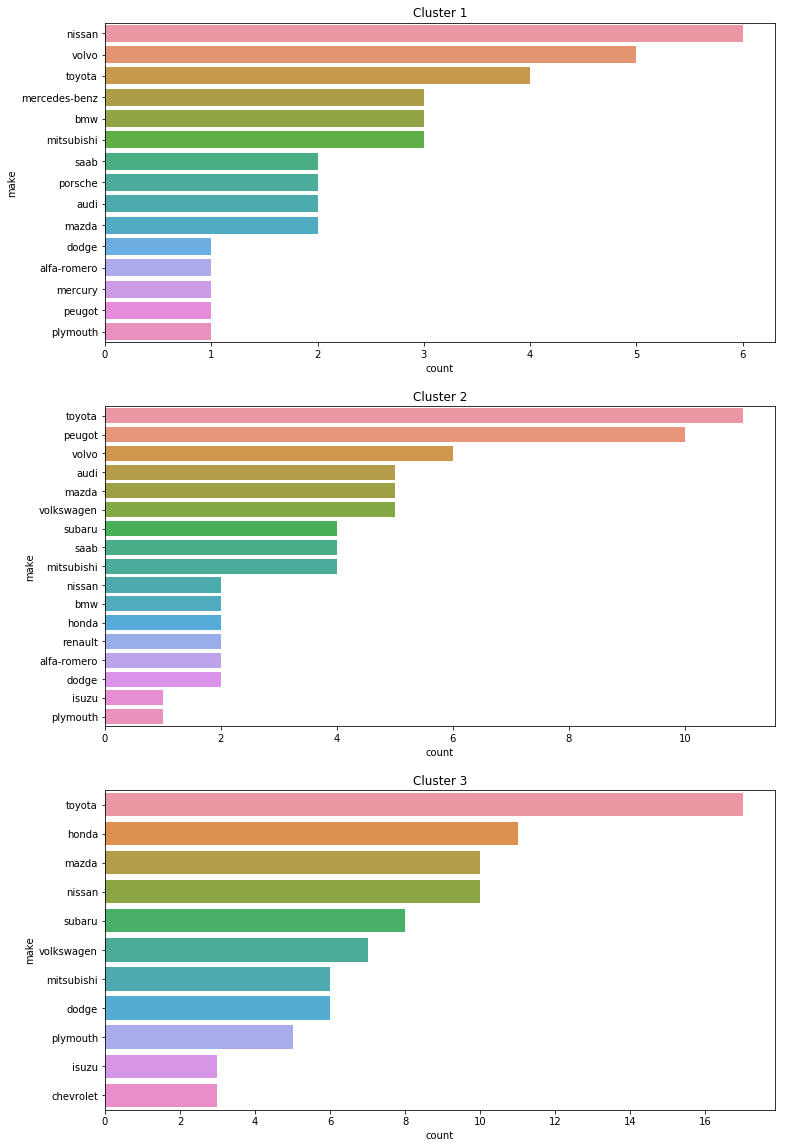

In [179]:
# Step 8. Visualisasi hasil clustering berdasarkan merk mobil
f=plt.figure(figsize=(12,20))
cluster1=Hasil[Hasil['Cluster'] == 1]
cluster2=Hasil[Hasil['Cluster'] == 2]
cluster3=Hasil[Hasil['Cluster'] == 3]
f.add_subplot(3,1,1)
sns.countplot(y=cluster1['make'],order=cluster1['make'].value_counts().index)
plt.title('Cluster 1')
f.add_subplot(3,1,2)
sns.countplot(y=cluster2['make'],order=cluster2['make'].value_counts().index)
plt.title('Cluster 2')
f.add_subplot(3,1,3)
sns.countplot(y=cluster3['make'],order=cluster3['make'].value_counts().index)
plt.title('Cluster 3')

### Hierarchical Clustering

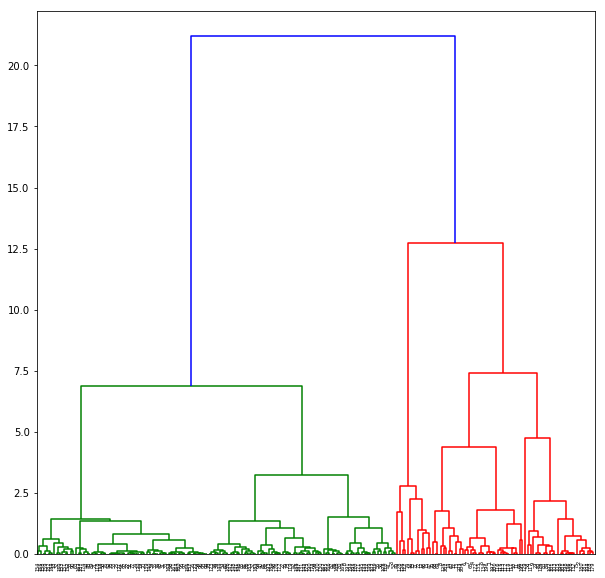

In [133]:
# Step 1. Membentuk dendogram dengan metode ward 
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [134]:
# Step 2. Melakukan fitting hierarchical clustering 
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

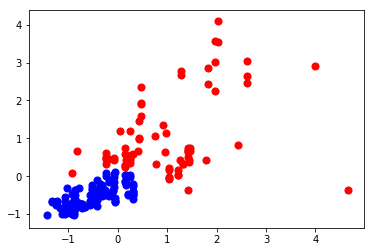

In [135]:
# Step 3. Mengeplot Data setelah dilakukan hierarchical clustering
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.show()

In [194]:
# Step 4. Memasukkan label hasil clustering kedalam data 
hr=data
hr['Cluster']=pd.DataFrame(labels+1)
Hasil=hr[['make','horsepower','price','Cluster']].sort_values(by=['Cluster','price'])
Hasil.head()

,make,horsepower,price,Cluster
9,audi,160.0,10295.0,1
129,porsche,288.0,10295.0,1
82,mitsubishi,145.0,12629.0,1
124,plymouth,145.0,12764.0,1
29,dodge,145.0,12964.0,1


Text(0.5,1,'Cluster 2')

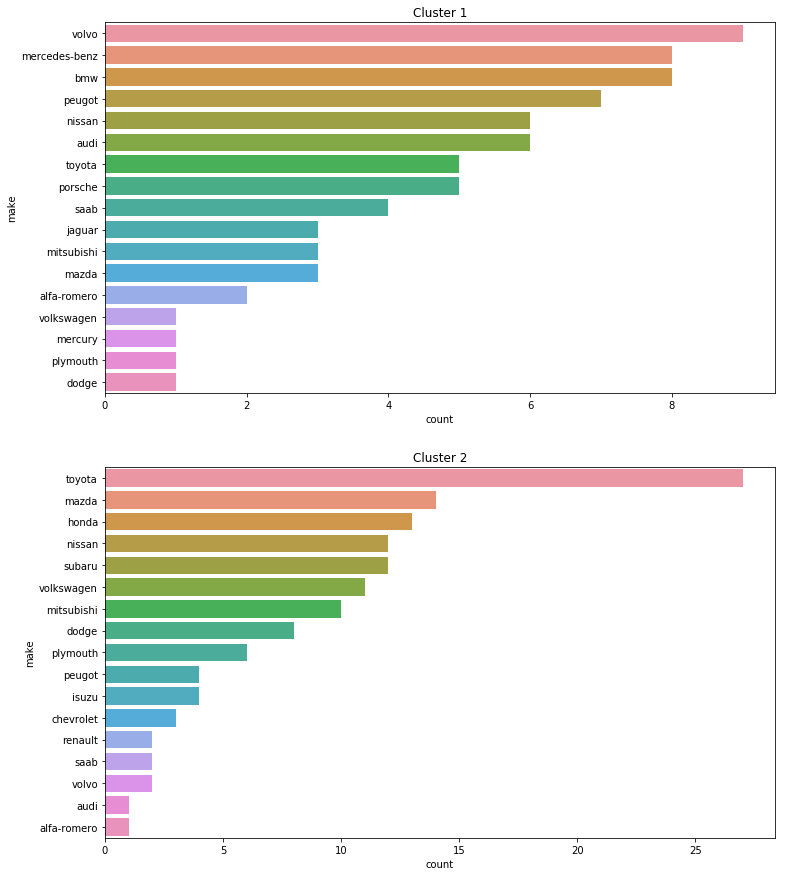

In [184]:
# Step 5. Visualisasi hasil clustering berdasarkan merk mobil
f=plt.figure(figsize=(12,15))
cluster1=Hasil[Hasil['Cluster'] == 1]
cluster2=Hasil[Hasil['Cluster'] == 2]
f.add_subplot(2,1,1)
sns.countplot(y=cluster1['make'],order=cluster1['make'].value_counts().index)
plt.title('Cluster 1')
f.add_subplot(2,1,2)
sns.countplot(y=cluster2['make'],order=cluster2['make'].value_counts().index)
plt.title('Cluster 2')

### DBSCAN

In [156]:
# Step 1. Melakukan aktivasi algoritma DBSCAN
dbscan = DBSCAN(eps=0.7,min_samples=2)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.7, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=1, p=None)

In [157]:
# Step 2. Menampilkan label dibangkitkan oleh algoritma dbscan 
print(dbscan.labels_)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  1  1  1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0]


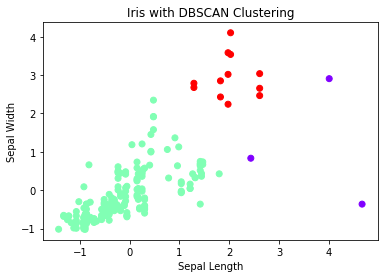

In [158]:
# Step 3. Visualisasi Hasil 
plt.scatter(X[:,0],X[:,1], c=dbscan.labels_, cmap='rainbow')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Iris with DBSCAN Clustering")
plt.show()

In [196]:
# Step 4. Memasukkan label hasil clustering kedalam data 
db=data
db['Cluster']=pd.DataFrame(dbscan.labels_+1)
Hasil=hr[['make','horsepower','price','Cluster']].sort_values(by=['Cluster','price'])
Hasil.head()

,make,horsepower,price,Cluster
129,porsche,288.0,10295.0,0
105,nissan,200.0,19699.0,0
49,jaguar,262.0,36000.0,0
138,subaru,69.0,5118.0,1
18,chevrolet,48.0,5151.0,1


Text(0.5,1,'Cluster 2')

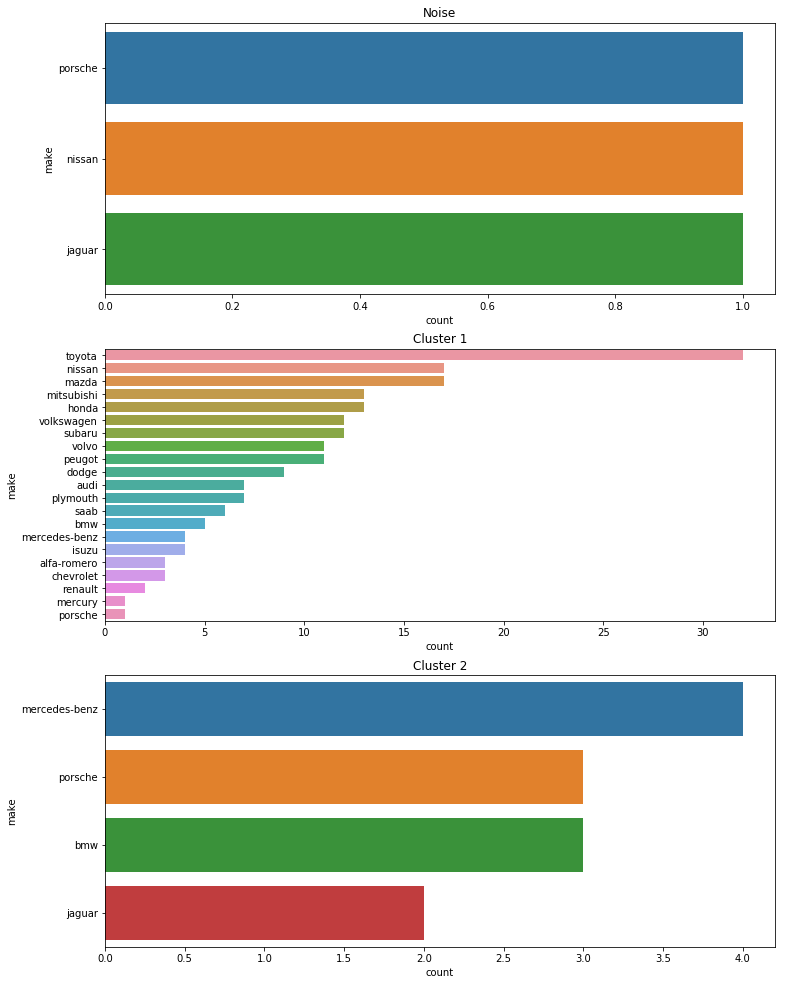

In [192]:
# Step 5. Visualisasi hasil clustering berdasarkan merk mobil
f=plt.figure(figsize=(12,17))
cluster1=Hasil[Hasil['Cluster'] == 0]
cluster2=Hasil[Hasil['Cluster'] == 1]
cluster3=Hasil[Hasil['Cluster'] == 2]
f.add_subplot(3,1,1)
sns.countplot(y=cluster1['make'],order=cluster1['make'].value_counts().index)
plt.title('Noise')
f.add_subplot(3,1,2)
sns.countplot(y=cluster2['make'],order=cluster2['make'].value_counts().index)
plt.title('Cluster 1')
f.add_subplot(3,1,3)
sns.countplot(y=cluster3['make'],order=cluster3['make'].value_counts().index)
plt.title('Cluster 2')

## Kesimpulan

### 1. Berapa cluster yang Anda buat? Anda menggunakan atribut/feature apa saja?

Dalam model K-Means, saya membuat 4 buah cluster berdasarkan scree plot. Untuk model Hierarichal Clustering, saya membuat 2 buah cluster berdasarkan plot dendogram. Sementara untuk model DBSCAN, terbentuk 2 buah cluster dengan noise. Dalam mosel ini saya memilih menggunakan feature horse power dan price sebagai atribut untuk mengelompokkan mobil. Selanjutnya digunakan feature make untuk melihat banyaknya mobil berdasarkan clusternya.

### 2. Manakah algoritma clustering yang Anda ambil? Mengapa?
Saya memilih menggunakan algoritma DBSCAN dikarenakan model ini dapat mengelompokkan mobil berdasarkan horsepower dan pricenya dengan lebih baik dan jelas. Selain itu, noise juga dapat dipisahkan sehingga kita bisa dapat lihat adanya pencilan dari data.

### 3. Apakah masing-masing cluster memiliki ciri-ciri yang berbeda? Apa saja ciri-ciri masing-masing cluster?
Ya. Pada model Kmeans ditentukan terlebih dahulu nilai k yaitu jumlah cluster yang akan dibuat selanjutnya tiap data akan di kelompokkan berdasarkan jarak dengan titik pusat kluster. Pada model Hierarcichal Clustering ditentukan terlebih dahulu Linkage dan methodnya, kemudian dibuat plot dendogramnya untuk menentukan jumlah kluster yang akan dibuat. Pada model DBSCAN ditentukan terlebih dahulu nilai epsilon dan minimal titik dimana data akan dimasukkan dalam satu kluster.